# TP 1: Équation de Poisson en 1D

On s'intéresse à la résolution numérique de l'équation de Poisson

$$
\left\{\begin{aligned}
&-u''(t) = f(t) \hbox{ sur } ]0,1[\\
&u(0) = u(1) = 0
\end{aligned}\right.$$

où $f: [0,1]\to\mathbb{R}$ est continue. Évidemment, dans ce cas la solution est triviale: $u$ est obtenue en primitivant $f$ deux fois et en fixant les constantes d'intégration de sorte à ce que $u(0)=u(1)=0$. Ce problème simple nous permettra surtout de faire quelques rappels de Python et d'analyse numérique. On considèrera deux méthodes différentes: la méthode de tir, qui passe par la résolution du problème de Cauchy pour l'équation correspondante, et la méthode des différences finies. 

### Quelques commentaires sur les Notebook Jupyter
Ce texte est rédigé sous la forme d'un notebook. Un notebook comporte des cellules de texte et des cellules de code, ici en Python. Quelques raccourcis clavier et remarques utiles:

- `CTRL+Entrée`: exécute la cellule de code, et affiche son résultat.
- `Tab`: Si l'on `Tab` après avoir tapé les premières lettres d'un nom de fonction, le système propose une liste de possibilités (ce qui peut permettre d'éviter des erreurs de frappe)
- `MAJ+Tab`: Affiche la documentation sur la fonction. Très utile pour ne pas se tromper sur l'ordre des paramètres. On peut voir une documentation plus complète en cliquant sur le '+'.
- `CTRL+s`: Enregistrer les modifications apportées au Notebook.
- Le symbole `[*]` à côté d'une cellule de code indique que le noyau Python est toujours en train de calculer. On peut l'interrompre via `Kernel -> Interrupt` ou le redémarrer via `Kernel -> Restart`. Le noyau Python repart alors de zéro, et il faut donc relancer les cellules antérieures à celle sur laquelle on travaillait.

Une aide complète, ainsi que la documentation de Python et Numpy, est disponible dans le menu `Aide`.


## 1. Méthode du tir
L'idée de la méthode du tir est la suivante: étant donné $a\in\mathbb{R}$, on considère le problème de Cauchy 

$$
\left\{\begin{aligned}
&-u_a''(t) = f(t) \hbox{ sur } ]0,1[ \\
&u_a(0) = 0, u_a'(0) = a
\end{aligned}\right.,$$

et on note $\Phi(a) := u_a(1)$. Il s'agit alors de trouver $a\in \mathbb{R}$ tel que $\Phi(a)=0$. Les deux ingrédients pour discrétiser ce problème sont les suivants: d'abord, une méthode de recherche de zéros d'une fonction $\Phi:\mathbb{R}\to\mathbb{R}$, et une méthode permettant d'évaluer la valeur de $\Phi$ de manière approchée par discrétisation du problème de Cauchy. L'objectif de cette partie est de se familiariser avec le langage Python et avec l'environnement Python Notebook. Ne pas hésiter à utiliser help(fonction) pour obtenir de l'aide sur une fonction, comme dans l'exemple suivant

In [2]:
import math
help(math.sqrt) # affiche l'aide sur la fonction racine

Help on built-in function sqrt in module math:

sqrt(...)
    sqrt(x)
    
    Return the square root of x.



### 1.1 Résolution de $\Phi(a) = 0$

On commence par importer la bibliothèque de calcul matriciel numpy et la bibliothèque de visualisation matplotlib, qui seront utiles dans tout les TP.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

On testera notre fonction de recherche de zéros sur $\Phi_0(x) = x^2 - 2$, ce qui revient à calculer $\sqrt{2}$.

In [7]:
def Phi0(x):                    # une fonction Python est définie par def F(x,y,z):
    return x*x-2                # noter les espaces avant le mot-clé return: ceux-ci indiquent à l'interprète Python que 
                                # l'instruction return fait partie du code de la fonction

print(Phi0(3))                  # on teste la fonction Phi0

**Q1)** Compléter la définition de la fonction dichotomie(Phi, a, b, eps) cherchant un zéro de Phi entre a et b. On vérifiera au début que $a\leq b$ et que $\Phi(a)\Phi(b) \leq 0$. Cette fonction s'arrètera dès lors que $|a-b|\leq$ eps et retournera alors $c:=(a+b)/2$. La fonction dichotomie pourra s'appeler elle-même. Tester la fonction dichotomie avec Phi0 (attention: il faut que a, b et eps soient des nombres flottants, p.ex. a=1., b=2. où le point indique que le nombre n'est pas entier). 

**Attention** Dans la fonction dichotomie on posera c = (a+b)/2.0, afin de signaler à Python qu'on doit prendre la division sur $\mathbb{R}$  et pas la division Euclidienne sur $\mathbb{Z}$!

In [4]:
def dichotomie(Phi,a,b, eps=1e-8):           # on donne une valeur par défaut à eps
    assert((a <= b) & (Phi(a)*Phi(b) <= 0))  # on vérifie la condition nécessaire à l'algorithme
    c = (a+b)/2.
    # compléter ... ne pas hésiter à utiliser print() pour comprendre les étapes intermédiaires

### 1.2 Résolution du problème de Cauchy

Pour vous guider dans la résolution du problème de Cauchy d'ordre $2$, on présente une fonction [t,y]=Euler(f,y_0,T,n) qui construit une solution approchée de l'EDO d'ordre un $y'(t) = G(t,y(t)), y(0) = y_0$ sur $[0,T]$ par une méthode d'Euler explicite, c'est-à-dire avec $h = T/N$,

$$
t_0 = 0, y_0\in \mathbb{R} 
\hbox{ et pour } 0\leq i\leq n-1, \left\{\begin{aligned}
&t_{i+1} = t_i + h \\
&y_{i+1} = y_i + h f(t_i,y_i) 
\end{aligned}\right.$$

Cette fonction retourne une liste $t = [t_0,\dots,t_n]$ et $y = [y_0,\dots,y_n]$.


In [6]:
def euler1D(G, y0, T, n):
    h = T / float(n)
    y = np.zeros(n+1)                     # on créé deux tableaux de zéros pour stocker les pas de temps
    t = np.zeros(n+1)                     # et les valeurs de y
    y[0] = y0
    t[0] = 0
    for i in range(n):
        y[i+1] = y[i] + h*G(t[i], y[i])
        t[i+1] = t[i] + h
    return t,y

On teste ensuite cette fonction sur l'EDO $y'=y$:

|y - ysol|_infty=0.013468


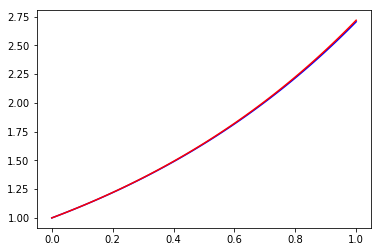

In [7]:
def G(t,y):
    return y
[t,y] = euler1D(G, y0=1, T=1, n=100)
print ("|y - ysol|_infty=%g" % np.max(np.abs(y-np.exp(t))))
plt.plot(t,y,'b') 
plt.plot(t,np.exp(t),'r')
plt.show()

**Q2)** Transformer le problème de Cauchy pour l'EDO d'ordre deux 

$$
\left\{\begin{aligned}
&-u_a''(t) = f(t) \hbox{ sur } [0,1] \\
&u_a(0) = 0, u_a'(0) = a
\end{aligned}\right.,$$

en un problème de Cauchy pour un système d'EDO d'ordre un, en les variables $(p(t),q(t)) = (u, u'(t)) \in \mathbb{R}^2$. En adaptant euler1D, écrire une fonction euler_ordre2(f, u0, uprime0, T, n) retournant deux tableaux de nombres, la liste des pas de temps $t_i = (Ti)/N$ pour $i\in 0,\dots,N$ et la liste des valeurs estimées $u_0,\dots,u_{n}$.

In [10]:
def euler_ordre2(f, u0, uprime0, T, n):
    h = T / float(n)
    # compléter

On testera cette fonction avec le second membre suivant, en visualisant la solution pour $u_0 = 1, u'_0 = -.5$, $T=1$ et $n=50$:

In [1]:
def f(t):
    sigma = .05
    return (1.0/(sigma*np.sqrt(2*np.pi)))*np.exp(-np.power((t-0.2)/sigma,2.0))

In [21]:
[t,x] = euler_ordre2(f,0,-.5,1,50)
plt.plot(t,x); plt.show()

**Q3)** Utiliser la fonction euler_ordre2 pour écrire une fonction Phi(a) calculant la valeur approchée de la solution du problème de Cauchy en $T=1$, i.e. $u_a(1)$ (on continuera à utiliser la fonction $f$ défini ci-dessus, et on prendra $n=50$). 

In [13]:
def Phi(a):
    # compléter

**Q4)** Tracer une solution approchée pour le problème original en combinant les fonctions Phi et dichotomie.

In [3]:
# compléter

## 2. Méthode des différences finies

On considère maintenant une deuxième méthode de résolution du problème, dont l'analyse a été présentée en cours. On approche l'EDO avec conditions de bord : 

$$
\left\{\begin{aligned}
&-u''(t) = f(t) \hbox{ sur } ]0,1[ \\
&u(0) = u(1) = 0
\end{aligned}\right.$$

Par le système linéaire de dimension finie 

$$
\left\{\begin{aligned}
&u_{0} = 0, u_{N+1} = 0 \\
&-\frac{1}{h^2}(u_{i-1} - 2 u_i + u_{i+1}) = f_i \hbox{ pour } 1\leq i\leq n
\end{aligned}\right.,$$

où $h = \dfrac{1}{N+1}$ et $t_i = h i$ pour $0\leq i\leq N+1$ et $f_i = f(t_i)$.

**Q5)** On pose $\bf U = (u_1,\dots, u_N)$ et $\bf F = (f_1,\dots,f_N)$. Écrire le système linéaire sous la forme $A_h \bf U = \bf F$, où $A_h$ est une matrice symétrique. Écrire une fonction $A(N)$ calculant cette matrice. 

(Créer une matrice vide à l'aide de A=np.zero((N,N)) et la remplir en faisant des boucles. Pour accéder à l'élément (i,j) de A, on écrit A[i,j].)

In [2]:
# compléter

**Q6)** On prend comme précédemment $N=50$. Construire le vecteur $s = [t_1,\dots,t_{n}]$, puis $\bf F = F(s)$ (i.e. $F_i = F(s_i)$). Résoudre le système linéaire en utilisant la fonction  `np.linalg.solve(A,F)`, qui retourne une solution du système linéaire $A\bf U = \bf F$. Afficher le résultat.

In [8]:
# compléter

**Q7)** Montrer que la matrice $A_h$ est symétrique définie positive (une possibilité de partir de l'écriture $A_h = M^T M$ où $M$ est une matrice ayant $(n+2)$ lignes et $n$ colonnes à définir).